***Supervised Learning Project***

We face an issue with customers leaving little by little at Beta Bank. We'd like to keep the current customers instead of finding new ones. We need to predict whether a customer will leave the bank with the data on each clients' past behavior.

1. Build a model with the maximum possible F1 score with an F1 score 59.0 or higher on the test set. 
2. Measuring the AUC-ROC metric and comparing it with the F1.



**Column Names**
1. RowNumber — data string index
2. CustomerId — unique customer identifier
3. Surname — surname
4. CreditScore — credit score
5. Geography — country of residence
6. Gender — gender
7. Age — age
8. Tenure — period of maturation for a customer’s fixed deposit (years)
9. Balance — account balance
10. NumOfProducts — number of banking products used by the customer
11. HasCrCard — customer has a credit card
12. IsActiveMember — customer’s activeness
13. EstimatedSalary — estimated salary
14. Exited — сustomer has left



In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [2]:
#Reading dataframe
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
#Printing the last 20 records
print(df.tail(5))

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995     5.0       0.00              2          1               0   
9996    10.0   57369.61              1          1               1   
9997     7.0       0.00              1          0               1   
9998     3.0   75075.31              2          1               0   
9999     NaN  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.5

In [4]:
#Looking at column name, data types, and missing records
print(df.info())
print()
print('Tenure has some missing values.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

Tenure has some missing values.


In [5]:
#One-Hot-Encoding to add a numerical value to both columns
data = pd.get_dummies(df, columns=['Geography', 'Gender'])

In [6]:
#Removing some columns that wont add any usefulness to our predictions and models
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [7]:
#Customers without a fixed deposit resulting in no tenure
no_loan = data['Tenure'].isnull().sum()

#Print the count of missing values
print(f'Customers with no loans: {no_loan}')

data['Tenure'].fillna(0,inplace=True)

Customers with no loans: 909


In [8]:
print(data.head())
print(data.info())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42     2.0       0.00              1          1   
1          608   41     1.0   83807.86              1          0   
2          502   42     8.0  159660.80              3          1   
3          699   39     1.0       0.00              2          0   
4          850   43     2.0  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2 

***Conclusion***

Prepared the data set with cleaning up missing values, changing both Geography / Gender to numeric values, and dropping columns that wont help during models / testing. 

After running the data.info we are seeing a new data type 'unit8' (unsigned interger 0-255)

In [9]:
#Feature and Target
feature = data.drop(['Exited'], axis=1)
target = data['Exited']

In [10]:
#Checking Class Balance
class_balance = target.value_counts()
print("Class balance:\n", class_balance)
print("\nClass distribution (percentage):\n", (class_balance / class_balance.sum()) * 100)

Class balance:
 0    7963
1    2037
Name: Exited, dtype: int64

Class distribution (percentage):
 0    79.63
1    20.37
Name: Exited, dtype: float64


In [11]:
#Spilting the data into a train and test feature
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=42)

#Define Model
model = RandomForestClassifier(random_state=42)
model.fit(feature_train, target_train)

target_prob = model.predict_proba(feature_test)[:, 1]
target_pred = model.predict(feature_test)

print('Classification Report:')
print(classification_report(target_test, target_pred))
print('AUC-ROC:', roc_auc_score(target_test, target_prob))

print()
print('F1 Score:', f1_score(target_test, target_pred))
 

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000

AUC-ROC: 0.8528509990474464

F1 Score: 0.5754310344827586


In [12]:
#Class Weights
class_weights = compute_class_weight('balanced', classes=target.unique(), y=target)
class_weights_dict = dict(zip(target.unique(), class_weights))
print(f'Class Weights: {class_weights_dict}')

Class Weights: {1: 2.454590083456063, 0: 0.6279040562602034}


***Conclusion***

First we set the features and target to the respected columns. After doing that we checked the class balance of the target. We find that we have way more (0 no) than we do (1 yes). Then we spilt the data set into the a train / test set. Left out the valid set becuase we will do that in our GridSearch module. From there we used a random forest classifier and fit our model with both of the train features and target. 

***Results***

After calling the classification report and Roc_auc_score:

Precision: For 0's we had 0.88 precision and for the 1's we had 0.78 precision

Recall: For 0's we had a recall score of .97 but for the 1's we had 0.46 recall score meaning the model struggles with findings the 1's.

F1-Score: For 0's we had a f1-score of 0.92 but for the 1's we had a 0.58 f1-score because this is the minority class. 


Classification Report with Grid Search and Resampling:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2416
           1       0.67      0.54      0.60       584

    accuracy                           0.86      3000
   macro avg       0.78      0.74      0.75      3000
weighted avg       0.85      0.86      0.85      3000

AUC-ROC with Grid Search and Resampling: 0.8436401444706523
F1-Score:  0.5950570342205322


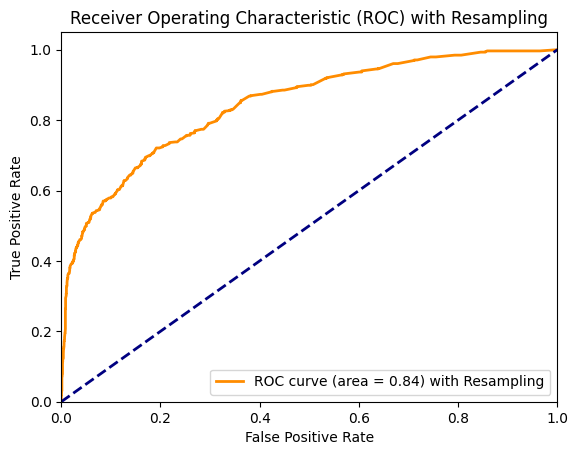

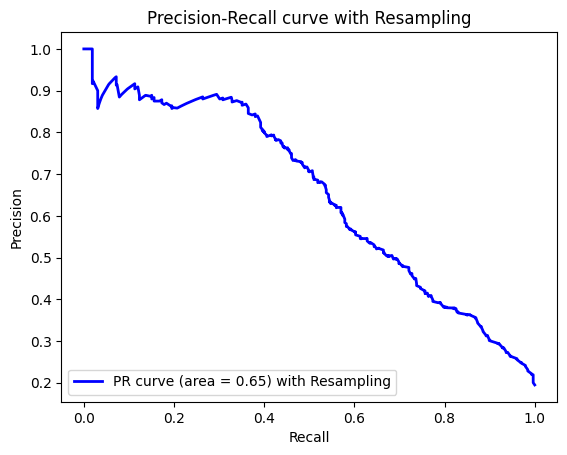

In [13]:
data_combined = pd.concat([feature_train, target_train], axis=1)

#Separate majority and minority classes
majority_class = data_combined[data_combined['Exited'] == 0]
minority_class = data_combined[data_combined['Exited'] == 1]

#Oversample minority class
minority_oversampled = resample(minority_class,
                                replace=True, 
                                n_samples=len(majority_class),  
                                random_state=42)  

#Combine majority class with oversampled minority class
data_oversampled = pd.concat([majority_class, minority_oversampled])

#Separate features and target for the oversampled data
feature_train_oversampled = data_oversampled.drop('Exited', axis=1)
target_train_oversampled = data_oversampled['Exited']

#Define the model for resampled data
model_resampled = RandomForestClassifier(random_state=42)

#Grid search parameter grid
param_grid_resampled = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Grid search with cross-validation on resampled data
grid_search_resampled = GridSearchCV(estimator=model_resampled, param_grid=param_grid_resampled, cv=5, scoring='f1', n_jobs=-1, verbose=0)
grid_search_resampled.fit(feature_train_oversampled, target_train_oversampled)

#Best model from grid search on resampled data
best_model_resampled = grid_search_resampled.best_estimator_

#Predictions and performance evaluation
target_prob_resampling = best_model_resampled.predict_proba(feature_test)[:, 1]
target_pred_resampling = best_model_resampled.predict(feature_test)

print('Classification Report with Grid Search and Resampling:')
print(classification_report(target_test, target_pred_resampling))
print('AUC-ROC with Grid Search and Resampling:', roc_auc_score(target_test, target_prob_resampling))

print('F1-Score: ', f1_score(target_test, target_pred_resampling))

#ROC Curve
fpr_resampling, tpr_resampling, _ = roc_curve(target_test, target_prob_resampling)
roc_auc_resampling = auc(fpr_resampling, tpr_resampling)

plt.figure()
plt.plot(fpr_resampling, tpr_resampling, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_resampling:.2f}) with Resampling')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with Resampling')
plt.legend(loc='lower right')
plt.show()

#PR Curve
precision_resampling, recall_resampling, _ = precision_recall_curve(target_test, target_prob_resampling)
pr_auc_resampling = auc(recall_resampling, precision_resampling)

plt.figure()
plt.plot(recall_resampling, precision_resampling, color='blue', lw=2, label=f'PR curve (area = {pr_auc_resampling:.2f}) with Resampling')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve with Resampling')
plt.legend(loc='lower left')
plt.show()




Optimal threshold: 0.27
Classification Report with Threshold Adjustment:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2416
           1       0.51      0.71      0.59       584

    accuracy                           0.81      3000
   macro avg       0.72      0.77      0.73      3000
weighted avg       0.84      0.81      0.82      3000

AUC-ROC with Threshold Adjustment: 0.8528509990474464

F1-Score:  0.5911047345767575


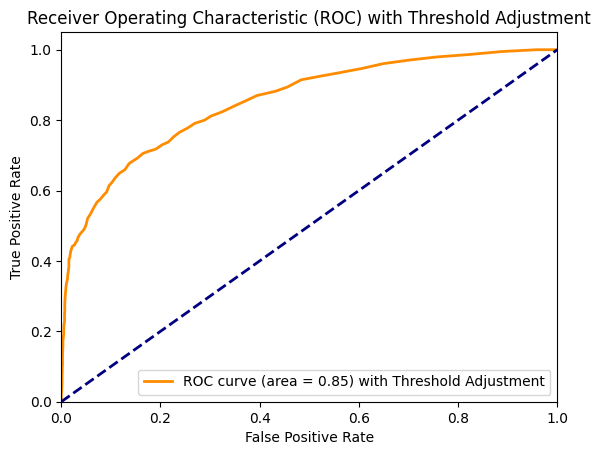

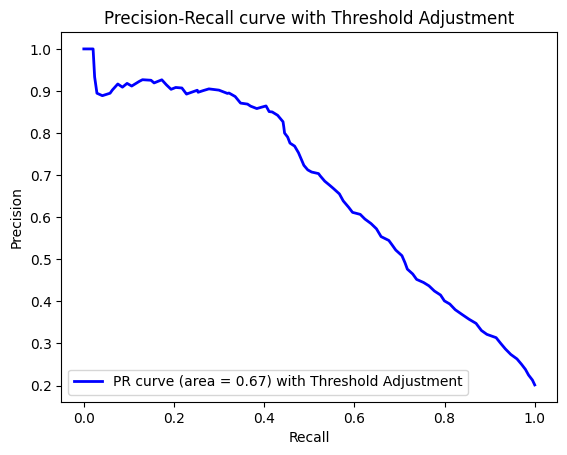

In [14]:
#Define and fit model on original (non-resampled) data
model_threshold_adjustment = RandomForestClassifier(random_state=42)
model_threshold_adjustment.fit(feature_train, target_train)

#Predictions and performance evaluation
target_prob_threshold = model_threshold_adjustment.predict_proba(feature_test)[:, 1]

#Find the best threshold using ROC curve
fpr, tpr, thresholds = roc_curve(target_test, target_prob_threshold)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold: {optimal_threshold:.2f}')

#Predict using the optimal threshold
target_pred_threshold = (target_prob_threshold >= optimal_threshold).astype(int)

print('Classification Report with Threshold Adjustment:')
print(classification_report(target_test, target_pred_threshold))
print('AUC-ROC with Threshold Adjustment:', roc_auc_score(target_test, target_prob_threshold))

print()
print('F1-Score: ',f1_score(target_test, target_pred_threshold))

#ROC Curve for threshold adjustment
fpr_threshold, tpr_threshold, _ = roc_curve(target_test, target_prob_threshold)
roc_auc_threshold = auc(fpr_threshold, tpr_threshold)

plt.figure()
plt.plot(fpr_threshold, tpr_threshold, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_threshold:.2f}) with Threshold Adjustment')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with Threshold Adjustment')
plt.legend(loc='lower right')
plt.show()

#PR Curve for threshold adjustment
precision_threshold, recall_threshold, _ = precision_recall_curve(target_test, target_prob_threshold)
pr_auc_threshold = auc(recall_threshold, precision_threshold)

plt.figure()
plt.plot(recall_threshold, precision_threshold, color='blue', lw=2, label=f'PR curve (area = {pr_auc_threshold:.2f}) with Threshold Adjustment')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve with Threshold Adjustment')
plt.legend(loc='lower left')
plt.show()

***Conclusion***

First we seperated the minority and majority to allow us to oversample the minority class. Then we combine both classes back together. Like before we seperate the features / target and define the model. Set the Grid search to find the best model. Then make your predictions on the target! 

***Final Conslusion Results:***

Precision: For 0's we had 0.92 precision and for the 1's we had 0.51 precision

Recall: For 0's we had a recall score of .84 but for the 1's we had 0.71 recall score meaning the model struggles with findings the 1's.

F1-Score: For 0's we had a f1-score of 0.88 but for the 1's we had a 0.59 f1-score because this is the minority class. 
 

With the F1-Score Module we have a f1-score of .591(threshold adjustment) and .595(Oversample)
